<a href="https://colab.research.google.com/github/XSkyleo/Probabilidad/blob/main/Cuaderno13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estadístico F: 32.49
Valor p: 0.0000
Rechazamos H0: Hay diferencias significativas entre los tipos de agave.


<ipython-input-1-c63c08ec26d8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo_agave', y='satisfaccion', data=data, palette='Set2')


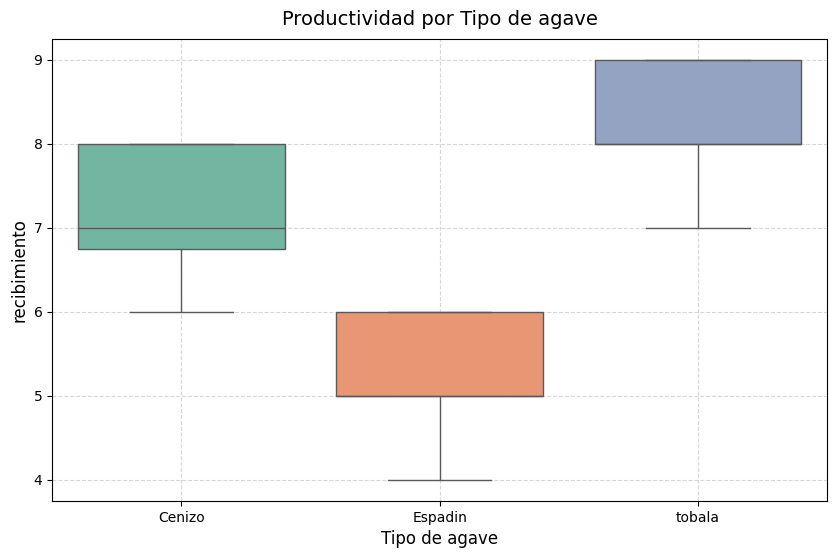

In [ ]:
import numpy as np
from scipy.stats import f_oneway
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos
cenizo = [7,8,6,7,8,7,6,8]
espadin = [5,6,5,4,6,5,5,6]
Tobala = [8,9,8,7,9,8,8,9]
f_stat, p_value = f_oneway(cenizo, espadin, Tobala)

# Imprimir resultados del ANOVA
print(f"Estadístico F: {f_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
if p_value < 0.05:
  print("Rechazamos H0: Hay diferencias significativas entre los tipos de agave.")
else:
  print("No rechazamos H0: No hay diferencias significativas.")

# Preparar datos para el gráfico
data = pd.DataFrame({'satisfaccion': cenizo + espadin + Tobala,
                   'Tipo_agave': ['Cenizo']*len(cenizo) + ['Espadin']*len(espadin) + ['tobala']*len(Tobala)})

# Crear el boxplot con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo_agave', y='satisfaccion', data=data, palette='Set2')
plt.title('Productividad por Tipo de agave', fontsize=14, pad=10)
plt.xlabel('Tipo de agave', fontsize=12)
plt.ylabel('recibimiento', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

                        sum_sq    df      F        PR(>F)
C(Cocción)               115.2   1.0  115.2  1.017496e-08
C(Levadura)               33.8   1.0   33.8  2.639728e-05
C(Cocción):C(Levadura)     1.8   1.0    1.8  1.984451e-01
Residual                  16.0  16.0    NaN           NaN

Factor: C(Cocción)
Estadístico F: 115.20, p-valor: 0.0000
Rechazamos H0: Hay un efecto significativo.

Factor: C(Levadura)
Estadístico F: 33.80, p-valor: 0.0000
Rechazamos H0: Hay un efecto significativo.

Factor: C(Cocción):C(Levadura)
Estadístico F: 1.80, p-valor: 0.1984
No rechazamos H0: No hay efecto significativo.


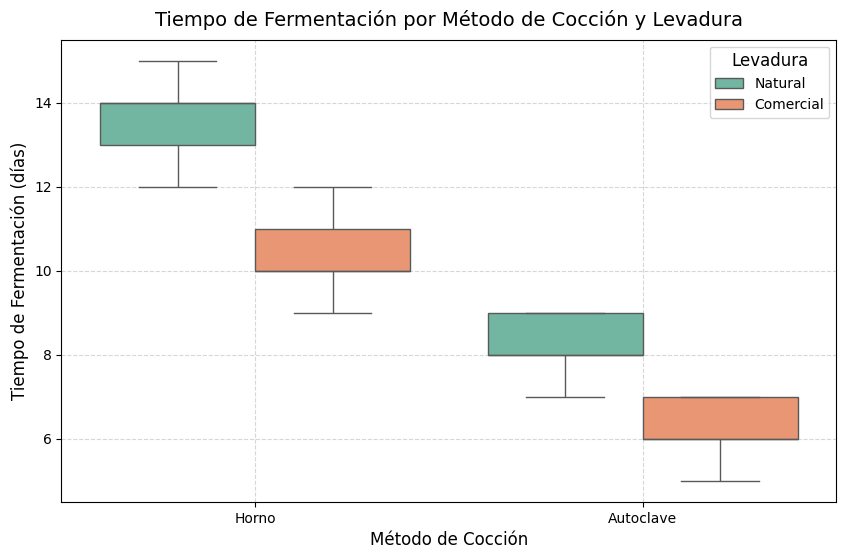

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Datos ficticios de tiempo de fermentación según método de cocción y levadura
data = {
    'Tiempo': [12, 14, 13, 15, 14, 10, 11, 9, 10, 12, 8, 9, 7, 8, 9, 6, 7, 5, 6, 7],
    'Cocción': ['Horno', 'Horno', 'Horno', 'Horno', 'Horno', 'Horno', 'Horno', 'Horno', 'Horno', 'Horno',
                'Autoclave', 'Autoclave', 'Autoclave', 'Autoclave', 'Autoclave', 'Autoclave', 'Autoclave', 'Autoclave', 'Autoclave', 'Autoclave'],
    'Levadura': ['Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Comercial', 'Comercial', 'Comercial', 'Comercial', 'Comercial',
                 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Comercial', 'Comercial', 'Comercial', 'Comercial', 'Comercial']
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Realizar ANOVA de dos vías
modelo = ols('Tiempo ~ C(Cocción) + C(Levadura) + C(Cocción):C(Levadura)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Imprimir tabla ANOVA
print(anova_table)

# Interpretación del ANOVA
alpha = 0.05
for factor in anova_table.index[:-1]: # Excluir Residual
  f_stat = anova_table.loc[factor, 'F']
  p_val = anova_table.loc[factor, 'PR(>F)']
  print(f"\nFactor: {factor}")
  print(f"Estadístico F: {f_stat:.2f}, p-valor: {p_val:.4f}")
  if p_val < alpha:
     print(f"Rechazamos H0: Hay un efecto significativo.")
  else:
     print(f"No rechazamos H0: No hay efecto significativo.")

# Crear gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cocción', y='Tiempo', hue='Levadura', data=df, palette='Set2')

# Títulos y etiquetas
plt.title('Tiempo de Fermentación por Método de Cocción y Levadura', fontsize=14, pad=10)
plt.xlabel('Método de Cocción', fontsize=12)
plt.ylabel('Tiempo de Fermentación (días)', fontsize=12)
plt.legend(title='Levadura', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.show()